In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv("card_cust.csv")
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0


# Q1.

In [63]:
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
base = df.copy()

In [73]:


df_q1 = base[["BALANCE", "TENURE", "CREDIT_LIMIT"]]

max_corr = 0

for tenure in df_q1["TENURE"].unique():
  df_q1_sub = df_q1[df_q1["TENURE"] == tenure]
  corr = df_q1_sub[["BALANCE", "CREDIT_LIMIT"]].corr().reset_index()
  mel = corr.melt("index")
  mel2 = mel.loc[mel["index"] != mel["variable"]]
  cur_cor = mel2["value"].max()
  if max_corr < cur_cor:
    max_corr = cur_cor

round(max_corr,2)

0.95

In [72]:
#답.

df_q1 = base[["TENURE", "BALANCE", "CREDIT_LIMIT"]].copy()

# 아래와 같이 corr 구한다
df_q1_sub = df_q1.loc[df_q1["TENURE"] == 12, ]
df_q1_sub[["BALANCE", "CREDIT_LIMIT"]].corr()

# groupby로 처리하자
df_q1_corr = df_q1.groupby("TENURE")[["BALANCE", "CREDIT_LIMIT"]].corr()

# 대각선을 삭제하기 위해 짝수를 건너띄거나 홀수를 건너띌 수 있다.
df_q1_corr.reset_index() #이거 쓰면 편하다.

# 다른 방법으로 xs를 쓰면 인덱스기반으로 뽑는거
df_q1_corr.xs("BALANCE", level=1)["CREDIT_LIMIT"].round(2).max()

0.95

# Q2.

In [82]:
df_q2 = base.copy()
df_q2  = df_q2.drop(columns=["CUST_ID"])


df_q2 = df_q2.fillna(0) # 결측값 평균으로 구치란게 있었다.. 사전에;; 그게 base


scalar = StandardScaler()
scalar.fit(df_q2)
arr_data = scalar.transform(df_q2)

k = 2
max_score = -2
max_k = 0
for k in [2,3,4,5]:
  model = KMeans(k)
  model.fit(arr_data)
  score = silhouette_score(arr_data, model.labels_)
  if max_score < score:
    max_score = score
    max_k = k


max_k

d:\2.Projects\8. Python\DS2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\2.Projects\8. Python\DS2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\2.Projects\8. Python\DS2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\2.Projects\8. Python\DS2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

2

d:\2.Projects\8. Python\DS2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\2.Projects\8. Python\DS2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\2.Projects\8. Python\DS2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


d:\2.Projects\8. Python\DS2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: >

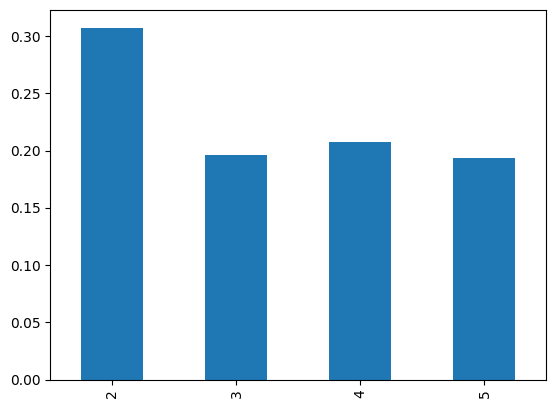

In [81]:
df_q2 = base.drop(columns="CUST_ID")
arr_q2_nor = StandardScaler().fit_transform(df_q2)

ls_k = list(range(2,6))
ls_sil = []
for k in ls_k:
    model_kmeans = KMeans(n_clusters=k, random_state=1234)
    model_kmeans.fit(arr_q2_nor)

    val_sil = silhouette_score(arr_q2_nor, labels=model_kmeans.labels_)
    ls_sil = ls_sil + [val_sil]

ser_s = pd.Series(ls_sil, index = ls_k)
ser_s.plot.bar()

In [85]:
best_k= ser_s.idxmax()

model_kmeans_best = KMeans(best_k, random_state=1234)
model_kmeans_best.fit(arr_q2_nor)

df_q2["cluster"] = model_kmeans_best.labels_
df_q2.groupby(["cluster"])["ONEOFF_PURCHASES"].mean().round(2).max()


d:\2.Projects\8. Python\DS2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3946.19

In [3]:
# Q3.

In [ ]:
#너무 졸리다

In [87]:
#답

df_train = base.loc[base["CUST_ID"] %4 != 0, ]
df_test = base.loc[base["CUST_ID"] %4 == 0, ]

model_dt = DecisionTreeRegressor(random_state=1234)
model_dt.fit(df_train.drop(columns=["CUST_ID", "ONEOFF_PURCHASES"]), df_train["ONEOFF_PURCHASES"])
pred = model_dt.predict(df_test.drop(columns=["CUST_ID", "ONEOFF_PURCHASES"]))

y_t = df_test["ONEOFF_PURCHASES"]
y_p = pred

val_rmse = ((y_t - y_p) ** 2).mean() ** 0.5  # E -> SE -> MSE -> RMSE 결국 RMSE 구하는거
round(val_rmse, 1)



1039.2

In [90]:
from sklearn.metrics import mean_squared_error
round(mean_squared_error(y_t, y_p) ** 0.5, 1)

1039.2

In [93]:
# 어떤 함수의 첫글자가 기억이 안날경우........?
# dir 써보자
import sklearn.metrics as sm
[ f for f in dir(sm) if "error" in f ]

['coverage_error',
 'd2_absolute_error_score',
 'max_error',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'mean_squared_log_error',
 'median_absolute_error']